In [54]:
import numpy as np
import pandas as pd 


import os
for dirname, _, filenames in os.walk('/Users/ilia/brainTumorClassification/archive-2/Brain Tumor Data Set/Brain Tumor Data Set'):
    for filename in filenames:
        # print(os.path.join(dirname, filename))
        pass


In [56]:
print(filename)

Cancer (1380).jpg


In [58]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [60]:
gen = ImageDataGenerator(
    rescale=1./255,
    validation_split = 0.2,
    zoom_range=(0.99,0.1),
    rotation_range=30,      # Поворот
    width_shift_range=0.2,  # Сдвиги по ширине
    height_shift_range=0.2, # Сдвиги по высоте
    horizontal_flip=True,
    dtype=np.float32)

In [62]:
train = gen.flow_from_directory('/Users/ilia/brainTumorClassification/archive-2/Brain Tumor Data Set/Brain Tumor Data Set',
                               target_size = (150,150),
                               batch_size = 256,
                               class_mode = "binary",
                               color_mode = "rgb",
                               shuffle = True,
                               seed = 123,
                               subset = "training")

Found 3681 images belonging to 2 classes.


In [64]:
val = gen.flow_from_directory('/Users/ilia/brainTumorClassification/archive-2/Brain Tumor Data Set/Brain Tumor Data Set',
                               target_size = (150,150),
                               batch_size = 8,
                               class_mode = "binary",
                               color_mode = "rgb",
                               shuffle = True,
                               seed = 123,
                               subset = "validation")
classes = val.class_indices

Found 919 images belonging to 2 classes.


# With grayscale as color mode we get high spikes in validation loss in training and substantially lower accuracy compared with a dataset with rgb color mode.

In [67]:
classes

{'Brain Tumor': 0, 'Healthy': 1}

In [69]:
import seaborn as sns

# Class distribution in training dataset

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


<Axes: >

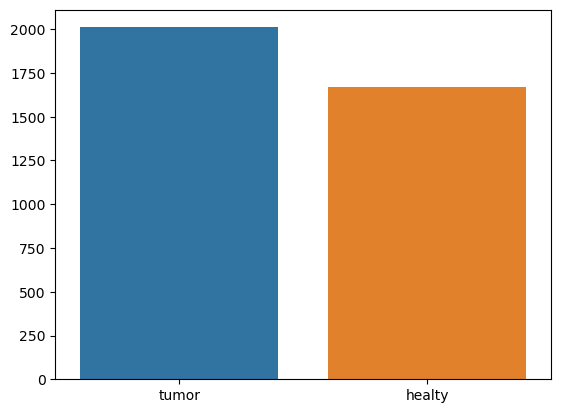

In [72]:
t=0
h=0
for i in range(15):
    a, b = next(train)
    for j in b:
        if j == 1:
            h+=1
        else:t+=1

sns.barplot(x=['tumor','healty'],y=[t,h])
    

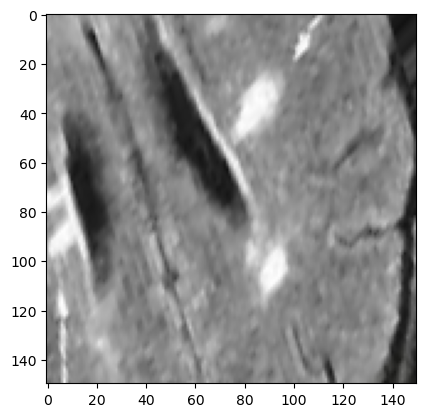

In [96]:
import matplotlib.pyplot as plt
batch = next(train)

plt.imshow(batch[0][9])

# Simple cnn

In [28]:
from keras.layers import Conv2D, MaxPool2D, LeakyReLU, BatchNormalization, Dropout, Dense, InputLayer, Flatten
from keras.losses import BinaryCrossentropy
from keras.optimizers import Adam
from keras import regularizers
from keras.layers import Dropout

In [30]:
# Начальная модель
model = keras.Sequential()
model.add(InputLayer(input_shape=(150, 150, 3)))

# Свёрточные и пула слои
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D())
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D())
model.add(Flatten())

# Полносвязные слои
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.001), loss=BinaryCrossentropy(), metrics=['accuracy'])

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 37, 37, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 20736)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,654,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,051,073 (11.64 MB)

 Trainable params: 3,051,073 (11.64 MB)

 Non-trainable params: 0 (0.00 B)

# Model plot

In [36]:
from keras import utils, callbacks
earlystopping = callbacks.EarlyStopping(monitor="val_loss", mode="min", 
                                        patience=5, restore_best_weights = True)

In [70]:
history = model.fit(train,verbose=1,callbacks = [earlystopping],epochs=,validation_data=(val))

Epoch 1/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 55s 3s/step - accuracy: 0.7004 - loss: 0.6040 - val_accuracy: 0.6007 - val_loss: 0.6922
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 58s 3s/step - accuracy: 0.6866 - loss: 0.6036 - val_accuracy: 0.6529 - val_loss: 0.6561
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 60s 4s/step - accuracy: 0.7096 - loss: 0.5805 - val_accuracy: 0.6289 - val_loss: 0.6947


# Plotting accuracy

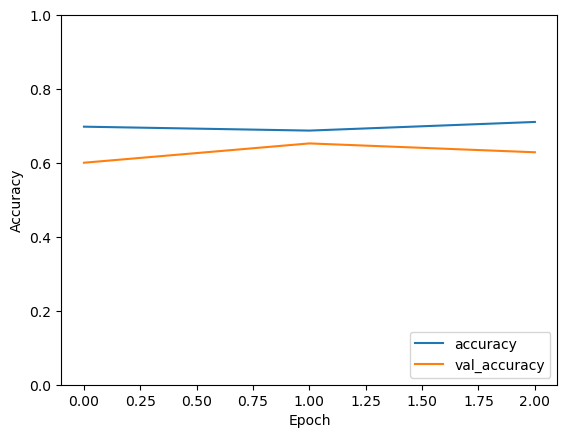

In [72]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

# Plotting loss

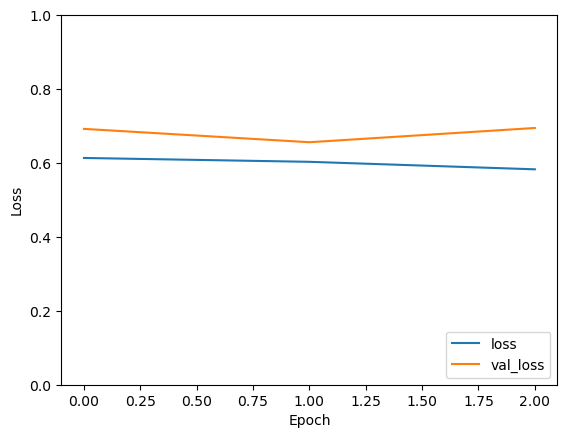

In [74]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [44]:
from PIL import Image
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img

img_path = '/Users/ilia/brainTumorClassification/archive-2/Brain Tumor Data Set/Brain Tumor Data Set/Healthy/Not Cancer  (1000).jpg'

image = load_img(img_path, target_size = (150,150))
image = img_to_array(image)
image = np.expand_dims(image, axis = 0)
image = image / 255.0

predictions = model.predict(image)
print('Predictions: ', predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
Predictions:  [[0.9258892]]


In [76]:
model.save('my_model2.keras')

In [50]:
from keras.models import load_model

models = load_model('my_model2.keras')